# Forecasting Using Holt Winters Model

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

In [90]:
import numpy as np
import pandas as pd

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
df = pd.read_csv("airline_passengers.csv", index_col= 0, parse_dates= True)

In [92]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [93]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [94]:
df.index.freq = "MS"

In [95]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

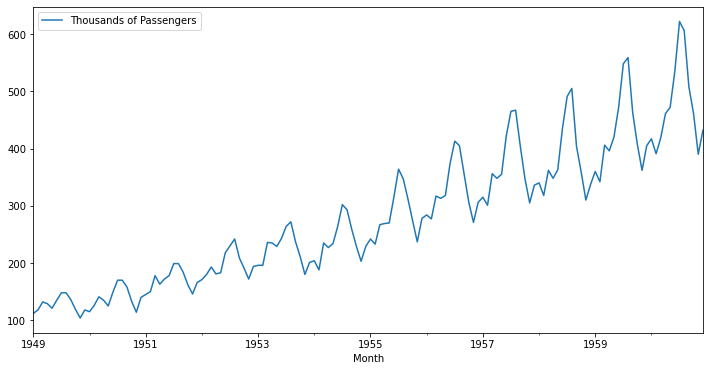

In [97]:
df.plot(figsize= (12,6))

### Train Test Split:

In [98]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [99]:
train_data = df[:108]

In [100]:
test_data = df[108:]

In [101]:
train_data.shape

(108, 1)

In [102]:
test_data.shape

(36, 1)

### Model Fitting (Multiplicative):

In [103]:
hw_model = ExponentialSmoothing(train_data["Thousands of Passengers"], trend= "mul", seasonal= "mul",
                               seasonal_periods= 12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [104]:
hw_model

In [105]:
hw_model.fittedvalues

Month
1949-01-01    110.828007
1949-02-01    118.621001
1949-03-01    134.924821
1949-04-01    130.012717
1949-05-01    124.486425
                 ...    
1957-08-01    449.806256
1957-09-01    400.414660
1957-10-01    349.858728
1957-11-01    307.684369
1957-12-01    350.356725
Freq: MS, Length: 108, dtype: float64

### Forecasting on Test Data:

In [106]:
predictions = hw_model.forecast(36) # Because out Test Data has 36 Rows, we want Predictions for 36 Months.

In [107]:
predictions

1958-01-01    356.968588
1958-02-01    344.588769
1958-03-01    405.718305
1958-04-01    400.610808
1958-05-01    409.001664
1958-06-01    480.694218
1958-07-01    530.470082
1958-08-01    523.288573
1958-09-01    454.210580
1958-10-01    392.518093
1958-11-01    345.928371
1958-12-01    396.605108
1959-01-01    408.958831
1959-02-01    394.775969
1959-03-01    464.808640
1959-04-01    458.957268
1959-05-01    468.570199
1959-06-01    550.704326
1959-07-01    607.729734
1959-08-01    599.502283
1959-09-01    520.363511
1959-10-01    449.685900
1959-11-01    396.310675
1959-12-01    454.368163
1960-01-01    468.521128
1960-02-01    452.272621
1960-03-01    532.505113
1960-04-01    525.801525
1960-05-01    536.814519
1960-06-01    630.910968
1960-07-01    696.241770
1960-08-01    686.816043
1960-09-01    596.151204
1960-10-01    515.179840
1960-11-01    454.030848
1960-12-01    520.544046
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

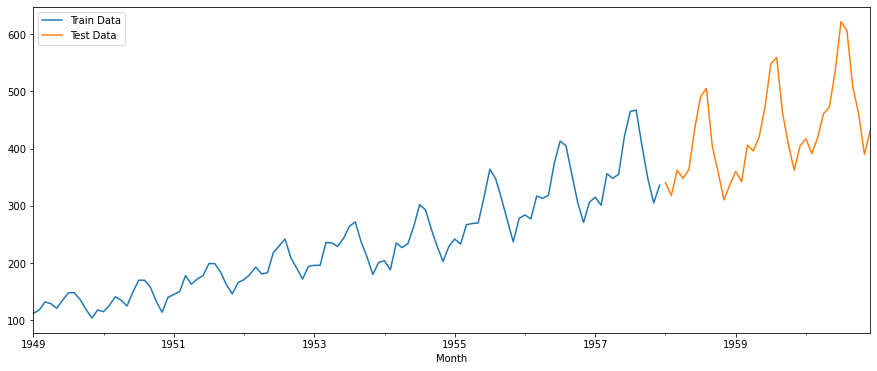

In [108]:
# Plotting Train and Test Data:

train_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Train Data")
test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")

<AxesSubplot:xlabel='Month'>

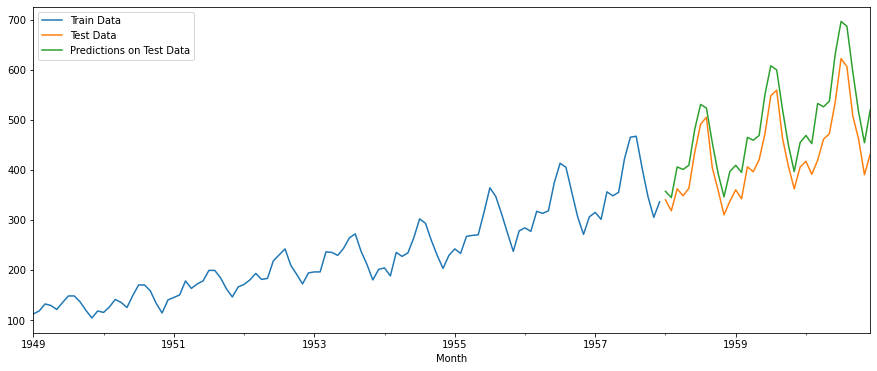

In [109]:
# Plotting Train Data, Test Data and Predictions for Test Data:

train_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Train Data")
test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")
predictions.plot(figsize= (15,6), legend= True, label= "Predictions on Test Data")

<AxesSubplot:xlabel='Month'>

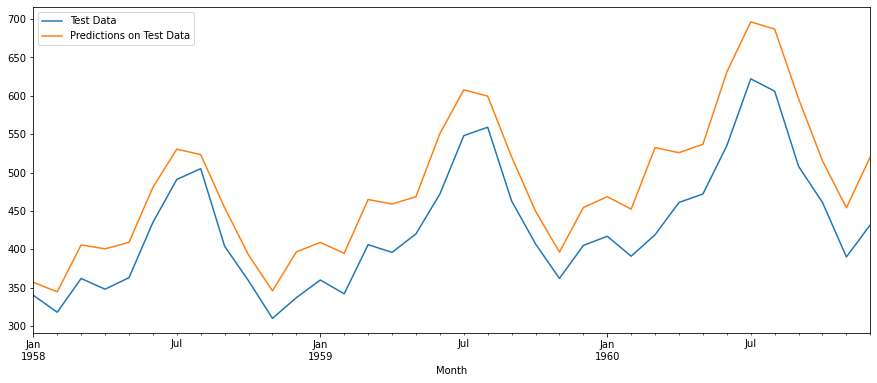

In [110]:
# Comparing Test Data and Predictions on Test Data:

test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")
predictions.plot(figsize= (15,6), legend= True, label= "Predictions on Test Data")

### Model Evaluation:

In [111]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [112]:
mean_absolute_error(test_data, predictions)

55.69800783318896

In [113]:
np.sqrt(mean_squared_error(test_data, predictions))

59.37921800042463

### Predictions on Future:

In [114]:
final_hw_model = ExponentialSmoothing(df["Thousands of Passengers"], trend= "mul", seasonal= "mul",
                                     seasonal_periods= 12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [115]:
future_preds = final_hw_model.forecast(36)

In [116]:
future_preds

1961-01-01    450.676188
1961-02-01    424.819851
1961-03-01    475.498652
1961-04-01    504.076454
1961-05-01    517.873481
1961-06-01    590.148606
1961-07-01    684.229327
1961-08-01    678.033731
1961-09-01    567.113162
1961-10-01    507.823947
1961-11-01    434.719759
1961-12-01    485.981045
1962-01-01    502.747655
1962-02-01    473.903857
1962-03-01    530.438125
1962-04-01    562.317828
1962-05-01    577.708973
1962-06-01    658.334821
1962-07-01    763.285699
1962-08-01    756.374259
1962-09-01    632.637844
1962-10-01    566.498309
1962-11-01    484.947608
1962-12-01    542.131662
1963-01-01    560.835499
1963-02-01    528.659067
1963-03-01    591.725346
1963-04-01    627.288454
1963-05-01    644.457904
1963-06-01    734.399323
1963-07-01    851.476305
1963-08-01    843.766312
1963-09-01    705.733298
1963-10-01    631.951951
1963-11-01    540.978820
1963-12-01    604.769963
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

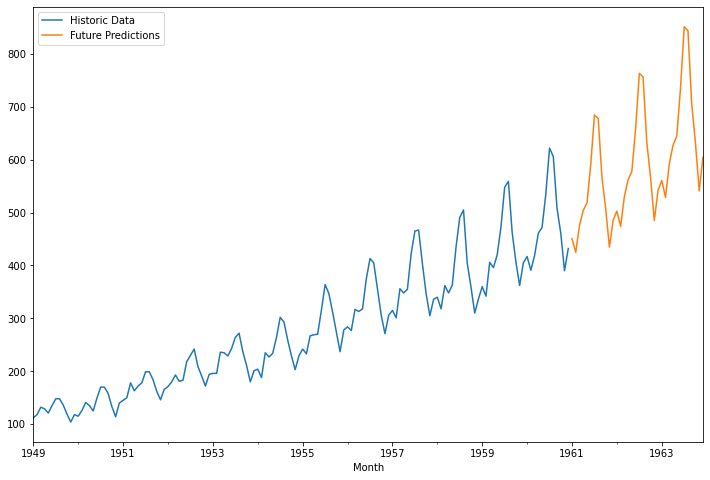

In [117]:
df["Thousands of Passengers"].plot(figsize=(12,8), legend= True, label= "Historic Data")
future_preds.plot(figsize=(12,8), legend= True, label= "Future Predictions")

### Model Fitting (Additive):

In [118]:
hw_model = ExponentialSmoothing(train_data["Thousands of Passengers"], trend= "add", seasonal= "add",
                               seasonal_periods= 12).fit()

In [119]:
hw_model

In [120]:
hw_model.fittedvalues

Month
1949-01-01    112.000916
1949-02-01    120.057273
1949-03-01    134.513171
1949-04-01    131.147571
1949-05-01    124.356674
                 ...    
1957-08-01    437.790314
1957-09-01    394.438471
1957-10-01    350.059658
1957-11-01    316.166005
1957-12-01    350.879707
Freq: MS, Length: 108, dtype: float64

### Forecasting on Test Data:

In [121]:
predictions = hw_model.forecast(36) # Because out Test Data has 36 Rows, we want Predictions for 36 Months.

In [122]:
predictions

1958-01-01    357.332104
1958-02-01    345.819839
1958-03-01    398.634181
1958-04-01    390.191556
1958-05-01    396.345895
1958-06-01    459.018924
1958-07-01    497.229298
1958-08-01    491.908601
1958-09-01    426.512237
1958-10-01    370.279066
1958-11-01    331.077553
1958-12-01    376.957260
1959-01-01    387.138894
1959-02-01    375.626628
1959-03-01    428.440971
1959-04-01    419.998345
1959-05-01    426.152684
1959-06-01    488.825713
1959-07-01    527.036088
1959-08-01    521.715391
1959-09-01    456.319026
1959-10-01    400.085855
1959-11-01    360.884343
1959-12-01    406.764050
1960-01-01    416.945683
1960-02-01    405.433418
1960-03-01    458.247760
1960-04-01    449.805135
1960-05-01    455.959474
1960-06-01    518.632503
1960-07-01    556.842877
1960-08-01    551.522180
1960-09-01    486.125816
1960-10-01    429.892645
1960-11-01    390.691132
1960-12-01    436.570839
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

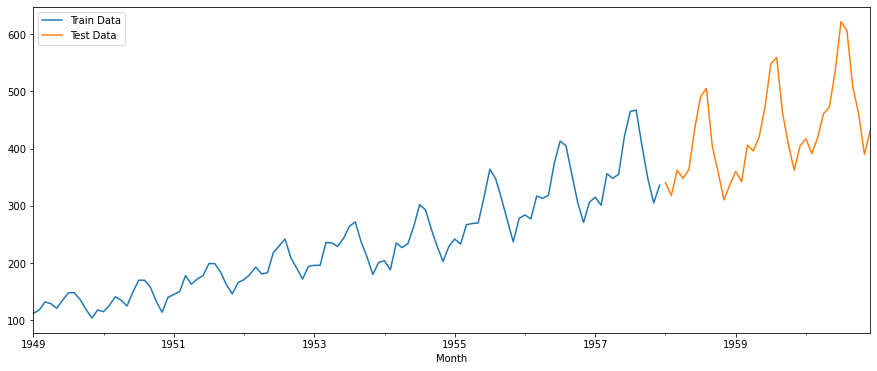

In [123]:
# Plotting Train and Test Data:

train_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Train Data")
test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")

<AxesSubplot:xlabel='Month'>

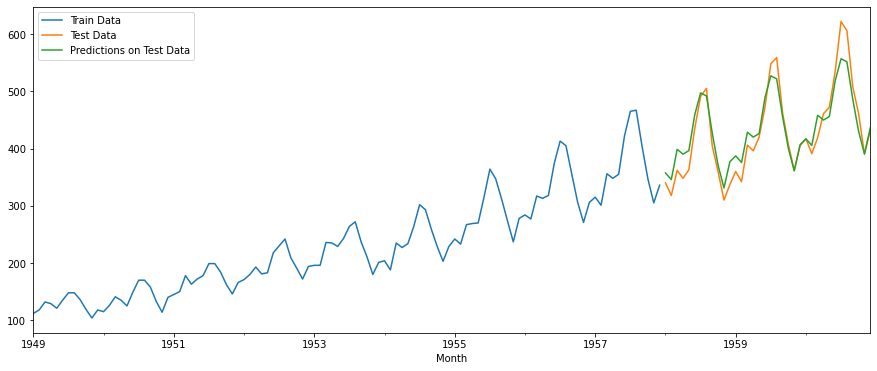

In [124]:
# Plotting Train Data, Test Data and Predictions for Test Data:

train_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Train Data")
test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")
predictions.plot(figsize= (15,6), legend= True, label= "Predictions on Test Data")

<AxesSubplot:xlabel='Month'>

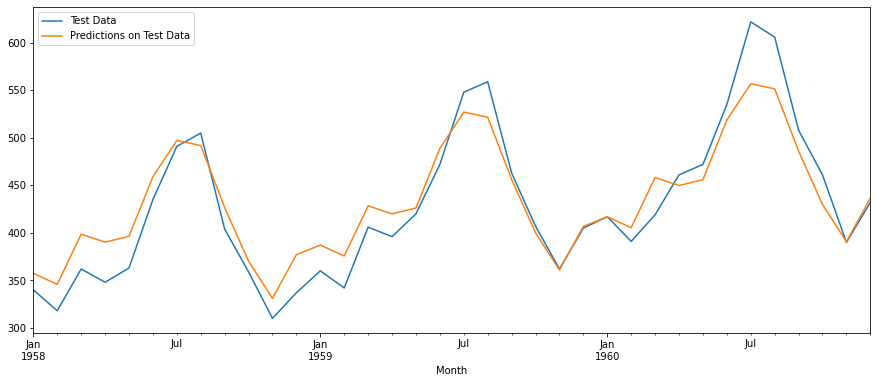

In [125]:
# Comparing Test Data and Predictions on Test Data:

test_data["Thousands of Passengers"].plot(figsize= (15,6), legend= True, label= "Test Data")
predictions.plot(figsize= (15,6), legend= True, label= "Predictions on Test Data")

### Model Evaluation:

In [126]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [127]:
mean_absolute_error(test_data, predictions)

21.544798071408238

In [128]:
np.sqrt(mean_squared_error(test_data, predictions))

26.375836858562828

### Predictions on Future:

In [129]:
final_hw_model = ExponentialSmoothing(df["Thousands of Passengers"], trend= "add", seasonal= "add",
                                     seasonal_periods= 12).fit()

In [130]:
future_preds = final_hw_model.forecast(36)

In [131]:
future_preds

1961-01-01    451.577217
1961-02-01    427.257711
1961-03-01    464.698851
1961-04-01    500.103045
1961-05-01    508.660666
1961-06-01    567.713780
1961-07-01    647.897240
1961-08-01    632.460970
1961-09-01    534.374295
1961-10-01    484.931025
1961-11-01    418.459425
1961-12-01    471.059063
1962-01-01    482.713420
1962-02-01    458.393914
1962-03-01    495.835054
1962-04-01    531.239248
1962-05-01    539.796869
1962-06-01    598.849983
1962-07-01    679.033443
1962-08-01    663.597173
1962-09-01    565.510498
1962-10-01    516.067227
1962-11-01    449.595628
1962-12-01    502.195266
1963-01-01    513.849623
1963-02-01    489.530117
1963-03-01    526.971257
1963-04-01    562.375451
1963-05-01    570.933072
1963-06-01    629.986186
1963-07-01    710.169646
1963-08-01    694.733376
1963-09-01    596.646701
1963-10-01    547.203430
1963-11-01    480.731831
1963-12-01    533.331469
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

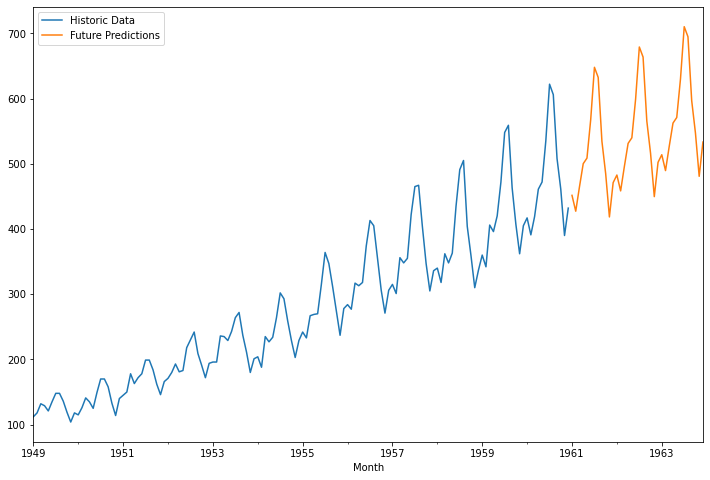

In [132]:
df["Thousands of Passengers"].plot(figsize=(12,8), legend= True, label= "Historic Data")
future_preds.plot(figsize=(12,8), legend= True, label= "Future Predictions")